# Mini project 3: The project

## Objective
We want to determine at which point the function 
$$
y=xe^{x^2},
$$

crosses the unit circle in the $x$-positive, $y$-positive quadrant using fixed-point simple iteration.

You should already have rewritten the problem 
in the form of a fixed-point problem, i.e. 
$$
x=g(x)
$$
that is suitable for iteration.

As well as the Guided Example for miniproject 3, the Guided Examples from miniprojects 1 and 2 can also be used as a guide for completing the tasks.

## The tasks
1. Plot the two curves to determine a starting point for iteration. Save the graph in a PDF file. 
*Hint: use `np.linspace` to generate an array with the x values. `np.exp` and `np.sqrt` returns an array with the exp and square root of the elements of the array given in input.* 
2. Write a function `myfun` that calculates $g(x)$. The function takes `x` and returns the value of the function at `x`.
3. Write a function `SimpleIter` that performs the simple iteration to find the abscissa of the intersection point. The function takes the initial guess `x0` and the tolerance `tol`. It returns the list of approximations generated by the simple iteration. To perform the iteration, use a `while` loop that performs
   $$
   x_n = g(x_{n-1}),
   $$
   while the absolute difference between the approximation of two successive approximation is larger than the tolerance.
5. Execute the `SimpleIter` using the starting approximation you estimated from the plot and setting the tolerance to `1e-15`. 
6. Consider the last value in the list of approximations generated by `SimpleIter` being the reference value. Generate the list of absolute errors, by taking the absolute value of the difference between the approximation and the reference value. 
*Hint: note that if you subtract a number from a list, it returns a list in which the number is subtracted from each element, similarly taking the absolute value of a list returns the list of the absolute values of the elements).
7. Plot the error at iteration $n$ against the error at iteration $n - 1$. Save the graph into a PDF file.  

# Python code


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plotting the curves to determine intial starting point that i can use for 
# fixed point iteration's initial approximation. 
x_values = np.linspace(0, 1, 1000)
y_function = x_values * np.exp(x_values**2)
y_circle = np.sqrt(1 - x_values**2)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_function, label='y = xe^{x^2}')
plt.plot(x_values, y_circle, label='y = √{1 - x^2} (Unit Circle)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Functions')
plt.legend()
plt.grid(True)
plt.savefig('miniproject_3/curve_plot.pdf')
plt.close()
plt.show()

Total iterations: 39
Final approximation: 0.5808750357617376
|g'(x*)| ≈ 0.4471
Corresponding y* value: 0.813992747405529


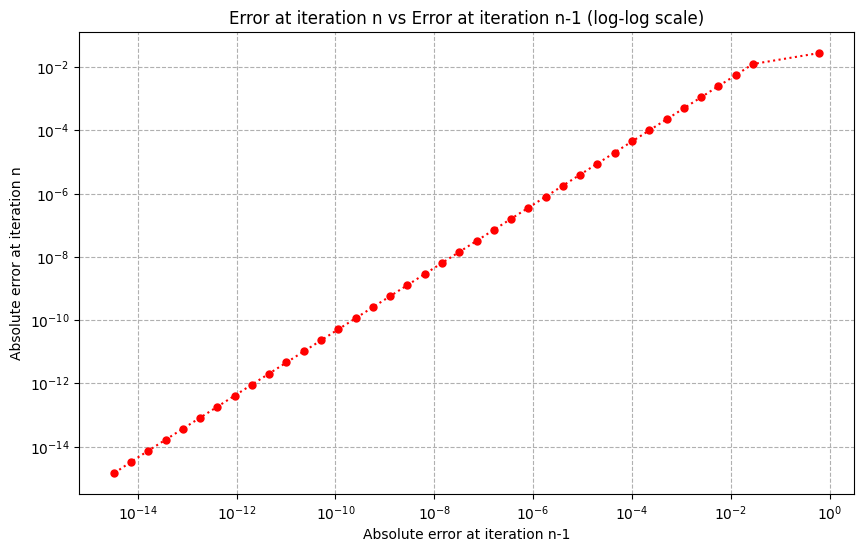

In [10]:
import numpy as np
import matplotlib.pyplot as plt

####################
# define functions #
####################

# g(x) for fixed-point iteration was obtained by substituting y = x * e^(x^2) into the equation of the unit circle, x^2 + y^2 = 1, and solving for x.
# this is used in the iteration process.
def myfun(x):
    return np.sqrt(1/(np.exp(2 * x**2) + 1))

# function to perform simple iteration using initial guess x0 -> continues until change between successive approximations is smaller than tol.
def SimpleIter(x0, tol):
    difference_list = []
    n = 0
    difference = 10
    difference_list.append(x0)

    while True:
        x_new = myfun(x0)
        difference = abs(x0 - x_new)
        difference_list.append(difference)
        
        if difference < tol:
            break
            
        x0 = x_new
        n += 1
        
    return difference_list, n, x_new

################
# MAIN SCRIPT! #
################

# execute the SimpleIter function
x0 = 0.6  # initial guess from the plot
tol = 1e-15
difference_list, iterations, approximated_value = SimpleIter(x0, tol)

print(f"Total iterations: {iterations}")
print(f"Final approximation: {approximated_value}")

# Calculate and print g_prime value at the fixed point
g_prime_value = abs(g_prime(approximated_value))
print(f"|g'(x*)| ≈ {g_prime_value:.4f}")

# Calculate and print y* value
y_star = approximated_value * np.exp(approximated_value**2)
print(f"Corresponding y* value: {y_star}")

############
# plotting #
############

# Log-log scale plot
plt.figure(figsize=(10, 6))
plt.loglog(difference_list[0:-2], difference_list[1:-1], ':ro', markersize=5)
plt.xlabel('Absolute error at iteration n-1')
plt.ylabel('Absolute error at iteration n')
plt.title('Error at iteration n vs Error at iteration n-1 (log-log scale)')
plt.grid(True, which='both', ls='--')
plt.savefig('miniproject_3/error_plot_loglog.pdf')
plt.show()


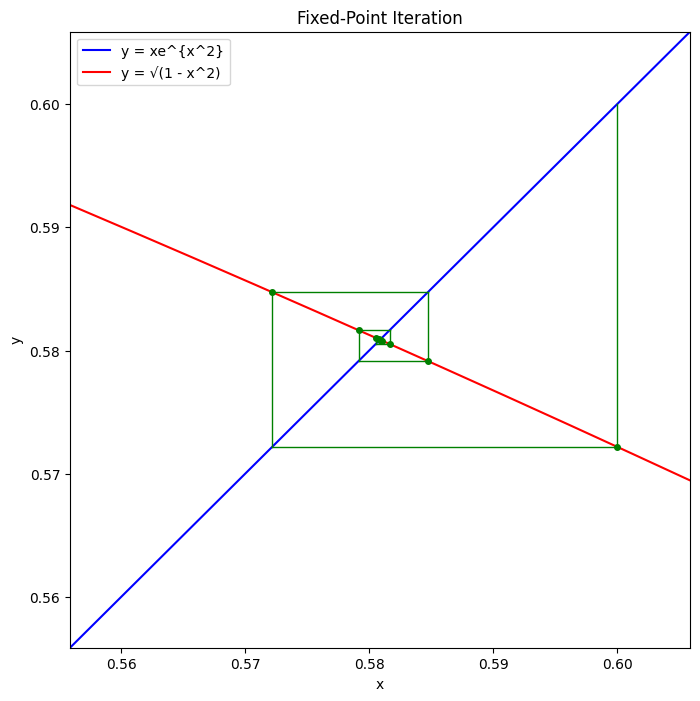

In [8]:
# NOTE: i did not include this in my final report, because it wasnt relevant. it was however very useful for me to visualiuse what was acutually happening!
# extra task: visulisaing fixed point iteration like in the notes
# I used these to assist me:
# https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes.plot

# from above. this is the fixed point its converging to.
converge = 0.5808750357617376

# create x values around the converge point - this is used as a 'frame' for graph
x = np.linspace(converge - 0.025, converge + 0.025, 1000)
fig, ax = plt.subplots(figsize=(8, 8))

# plot y = x line and y = g(x) line
ax.plot(x, x, 'b-', label='y = xe^{x^2}')
ax.plot(x, myfun(x), 'r-', label='y = √(1 - x^2)')
x_current = x0
num_iterations = 10

for i in range(num_iterations):
    y_current = myfun(x_current)
    ax.plot([x_current, x_current, y_current], [x_current, y_current, y_current], 'g-', linewidth=1)
    ax.plot(x_current, y_current, 'go', markersize=4)
    x_current = y_current

# set plot labels, title, and limits
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Fixed-Point Iteration')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(x.min(), x.max())

ax.legend()
# plt.savefig('miniproject_3/fixed_point_iteration.pdf')
plt.show()